# Getting Started

## import needed packages

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

## Load and Preprocess Data 

In [166]:
from os import listdir
from PIL import Image

X = []     # X -> to store images as 2D arrays 
Y = []     # Y -> to store one hot encoding 
X2 = []    # for support vector machine 
X_rgb = [] # for rgb images
# ----------------------------------- load and preprocess images-------------------------------------
# get the image directory

for i in range(10):
    folder_dir = f"/kaggle/input/sign-language-dataset/Sign-Language-Digits-Dataset-master/Dataset/{i}"
    for image in listdir(folder_dir):
 
    # check if the image ends with JPG
        
        if (image.endswith(".JPG")):
            #  Convert each image to gray
            img = Image.open(folder_dir+'/'+image)
            # we have to check the image size before loading it 
            width, height = img.size
            if width == 100 and height == 100:
                # GET X,y to be ready 
                X.append(np.array(img.convert('L')))
                X2.append(np.array(img.convert('L')).reshape(10000,))
                X_rgb.append(np.array(img))
                Y.append([1 if j==i else 0 for j in range(10)])
            

# turn X to 3D array as it's a list right now 

X = np.array(X)  # contain images in 3D shape
Y = np.array(Y) # contain one hot encoder for images 
X2 = np.array(X2) # flatten images 2D shape 

# for rgb images 4D shape 
X_rgb = np.array(X_rgb) 

# Divide each image by 255
X = X/255.0
X2 = X2/255.0

# normalization RGB images 
def normalize_rgb_images(images):
  
  # Calculate average for each channel
  avg_red = np.mean(images[:,:,:,0])
  avg_green = np.mean(images[:,:,:,1])
  avg_blue = np.mean(images[:,:,:,2])

  # Subtract average from each channel
  images[:,:,:,0] = images[:,:,:,0] - avg_red
  images[:,:,:,1] = images[:,:,:,1] - avg_green
  images[:,:,:,2] = images[:,:,:,2] - avg_blue

  
  return images

# Normalize RGB Images 
X_rgb = normalize_rgb_images(X_rgb)

# Divide each image by 255
X_rgb = X_rgb/255.0

# just to make sure let's check the shape of (X,y)
print ("images 3D array shape:",X.shape)
print ("images flatten 2D array shape:",X2.shape)
print ("RGB images 4D arrays shape:",X_rgb.shape)
print ("images one hot encoder label:",Y.shape)

# now let's store labels in y 
y = np.argmax(Y,axis=1)
print ("images classes vector: ",y) 



images 3D array shape: (2059, 100, 100)
images flatten 2D array shape: (2059, 10000)
RGB images 4D arrays shape: (2059, 100, 100, 3)
images one hot encoder label: (2059, 10)
images classes vector:  [0 0 0 ... 9 9 9]


# Visualizing Image 

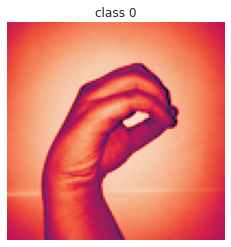

In [167]:
# just to make sure all is fine 
def visualize_image(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)
    
visualize_image(X[0], f"class {y[0]}")

# Modeling 


# CNN : First Model 

In [168]:

# Split data for CNN
X_train, X_test, y_train, y_test = train_test_split(X_rgb, y, train_size=0.8, shuffle=True, random_state=1)

# in the shape of inputs the one for color channel as it's gray image so there are just one color channel  

inputs = tf.keras.Input(shape=(100, 100, 3))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

# units for neurons 
dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 96, 96, 6)         456       
_________________________________________________________________
average_pooling2d_61 (Averag (None, 48, 48, 6)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 44, 44, 16)        2416      
_________________________________________________________________
average_pooling2d_62 (Averag (None, 22, 22, 16)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 120)             

# Training

In [169]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
42/42 [==============================] - 1s 19ms/step - loss: 1.9652 - accuracy: 0.2870 - val_loss: 1.4245 - val_accuracy: 0.5333
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 1.0483 - accuracy: 0.6431 - val_loss: 0.8660 - val_accuracy: 0.7061
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.6664 - accuracy: 0.7897 - val_loss: 0.8032 - val_accuracy: 0.7455
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.4603 - accuracy: 0.8504 - val_loss: 0.7388 - val_accuracy: 0.7485
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 0.3111 - accuracy: 0.8952 - val_loss: 0.7111 - val_accuracy: 0.7727
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 0.2183 - accuracy: 0.9362 - val_loss: 0.6494 - val_accuracy: 0.8091
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 0.1364 - accuracy: 0.9582 - val_loss: 0.6288 - val_accuracy: 0.8121
Epoch 8/100


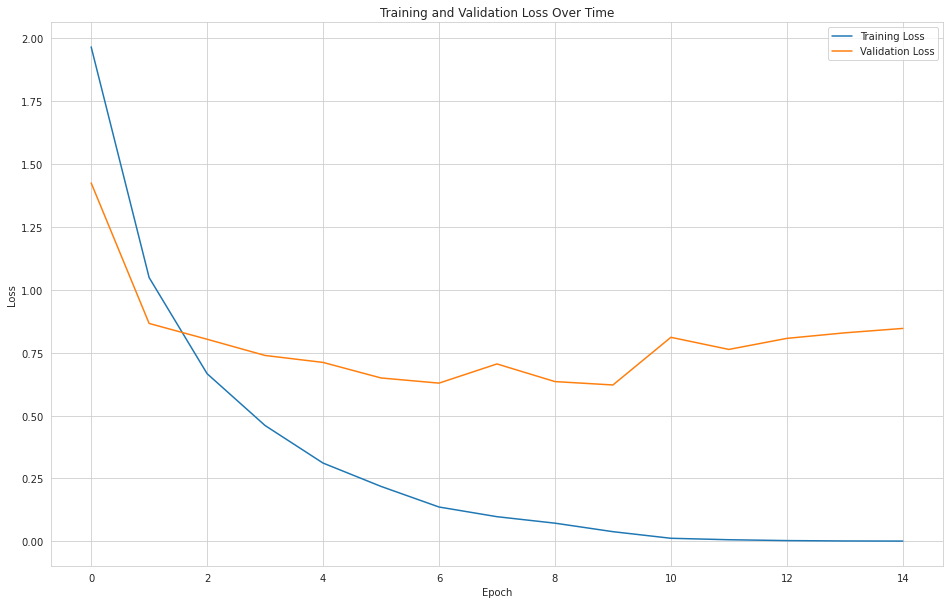

In [170]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

# First Model Results

In [171]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

## confusion Matrix 

Test Loss: 0.64273
Test Accuracy: 84.95%


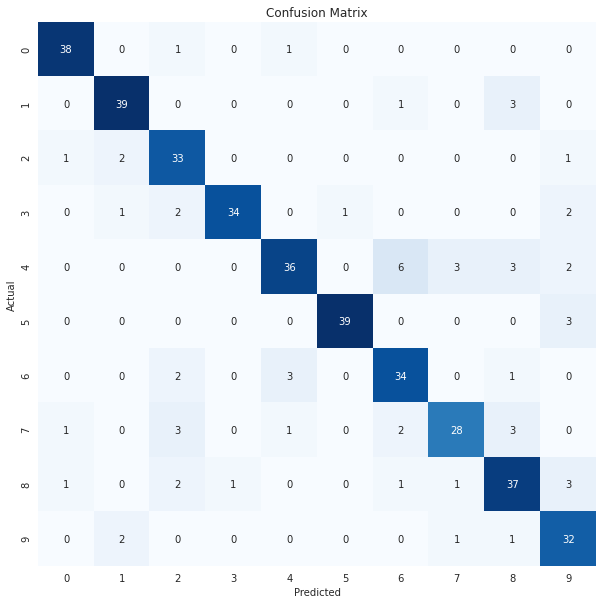

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.89      0.91      0.90        43
           2       0.77      0.89      0.82        37
           3       0.97      0.85      0.91        40
           4       0.88      0.72      0.79        50
           5       0.97      0.93      0.95        42
           6       0.77      0.85      0.81        40
           7       0.85      0.74      0.79        38
           8       0.77      0.80      0.79        46
           9       0.74      0.89      0.81        36

    accuracy                           0.85       412
   macro avg       0.85      0.85      0.85       412
weighted avg       0.86      0.85      0.85       412



In [172]:
evaluate_model(model, X_test, y_test)

## Train First CNN Model Using Cross Validation 

In [173]:
def evaluate_model_cv(model, X, y):
    
    y_pred = np.argmax(model.predict(X), axis=1)
    
    cm = confusion_matrix(y, y_pred)
    clr = classification_report(y, y_pred)
    
    results = model.evaluate(X, y, verbose=0)
    
    return results[1] * 100
    
n_folds = 3
train_cv_scores = list()
test_cv_scores = list()

for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(X_rgb, y, test_size=0.33, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    train_accuracy = evaluate_model_cv(model, X_train, y_train)
    train_cv_scores.append(train_accuracy)
    
    test_accuracy = evaluate_model_cv(model, X_val, y_val)
    test_cv_scores.append(test_accuracy)

print('\n Train Mean Estimated Accuracy %.3f' % (np.mean(train_cv_scores)))
print('\n Test Mean Estimated Accuracy %.3f' % (np.mean(test_cv_scores)))



 Train Mean Estimated Accuracy 93.957

 Test Mean Estimated Accuracy 94.755


* ## Second CNN Model 

In [174]:
# in the shape of inputs the one for color channel as it's gray image so there are just one color channel  
inputs = tf.keras.Input(shape=(100, 100, 3))

conv1 = tf.keras.layers.Conv2D(filters=10, kernel_size=(6, 6), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=24, kernel_size=(6, 6), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

conv3 = tf.keras.layers.Conv2D(filters=30, kernel_size=(6, 6), activation='relu')(pool1)
pool3 = tf.keras.layers.AveragePooling2D()(conv3)

flatten = tf.keras.layers.Flatten()(pool3)

# units for neurons 
dense1 = tf.keras.layers.Dense(units=150, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=95, activation='relu')(dense1)
dense3 = tf.keras.layers.Dense(units=82, activation='relu')(dense2)


outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense3)


model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model2.summary())

Model: "functional_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 95, 95, 10)        1090      
_________________________________________________________________
average_pooling2d_63 (Averag (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 42, 42, 30)        10830     
_________________________________________________________________
average_pooling2d_65 (Averag (None, 21, 21, 30)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 13230)             0         
_________________________________________________________________
dense_88 (Dense)             (None, 150)             

## Training

In [175]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
35/35 [==============================] - 0s 11ms/step - loss: 2.2625 - accuracy: 0.1741 - val_loss: 1.9629 - val_accuracy: 0.2935
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 1.5034 - accuracy: 0.4751 - val_loss: 1.2788 - val_accuracy: 0.5906
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.9484 - accuracy: 0.6627 - val_loss: 0.8187 - val_accuracy: 0.7500
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 0.5795 - accuracy: 0.8087 - val_loss: 0.6876 - val_accuracy: 0.7681
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 0.3622 - accuracy: 0.8776 - val_loss: 0.6898 - val_accuracy: 0.7862
Epoch 6/100
35/35 [==============================] - 0s 7ms/step - loss: 0.2572 - accuracy: 0.9275 - val_loss: 0.7473 - val_accuracy: 0.8007
Epoch 7/100
35/35 [==============================] - 0s 7ms/step - loss: 0.1540 - accuracy: 0.9610 - val_loss: 0.7721 - val_accuracy: 0.8007
Epoch 8/100


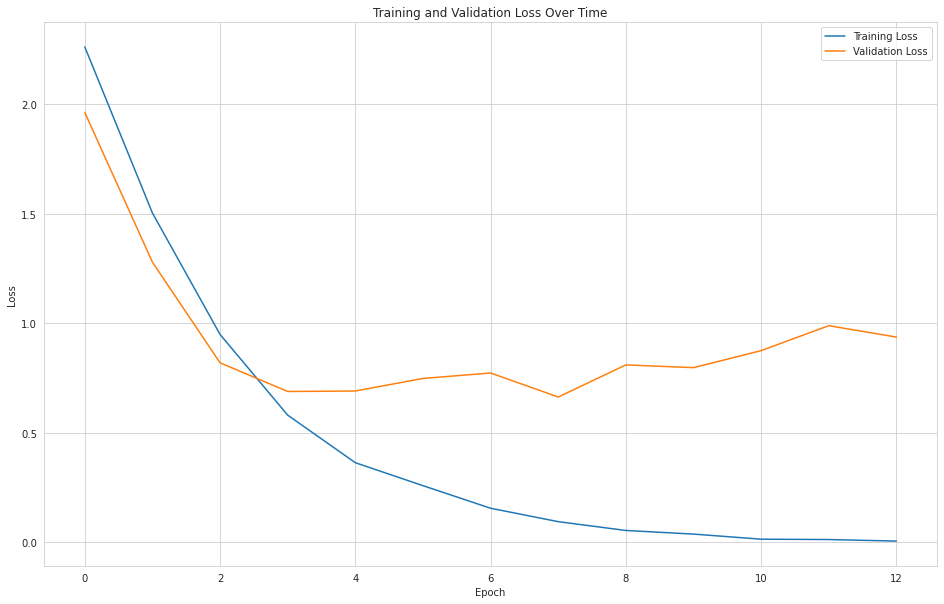

In [176]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

## Second Model Results 

Test Loss: 0.24933
Test Accuracy: 93.20%


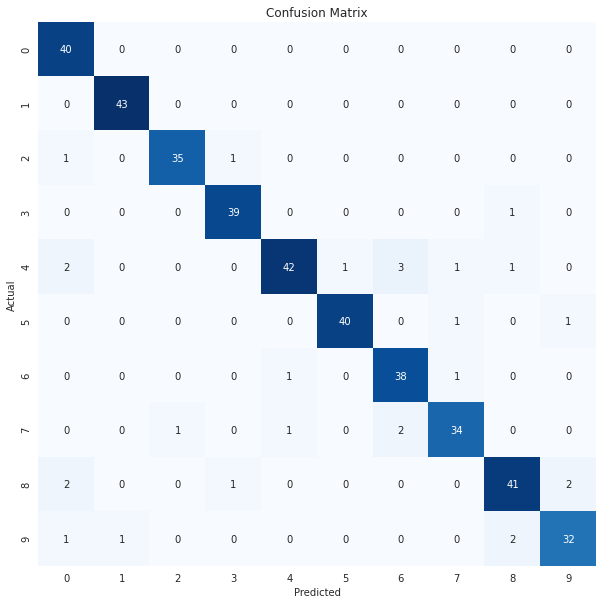

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       0.98      1.00      0.99        43
           2       0.97      0.95      0.96        37
           3       0.95      0.97      0.96        40
           4       0.95      0.84      0.89        50
           5       0.98      0.95      0.96        42
           6       0.88      0.95      0.92        40
           7       0.92      0.89      0.91        38
           8       0.91      0.89      0.90        46
           9       0.91      0.89      0.90        36

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412



In [177]:
evaluate_model(model2, X_test, y_test)

## Train Second CNN Model Using Cross Validation 

In [178]:
def evaluate_model_cv(model, X, y):
    
    y_pred = np.argmax(model.predict(X), axis=1)
    
    cm = confusion_matrix(y, y_pred)
    clr = classification_report(y, y_pred)
    
    results = model.evaluate(X, y, verbose=0)
    
    return results[1] * 100
    
n_folds = 3
train_cv_scores = list()
test_cv_scores = list()

for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(X_rgb, y, test_size=0.33, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    train_accuracy = evaluate_model_cv(model2, X_train, y_train)
    train_cv_scores.append(train_accuracy)
    
    test_accuracy = evaluate_model_cv(model2, X_val, y_val)
    test_cv_scores.append(test_accuracy)

print('\n Train Mean Estimated Accuracy %.3f' % (np.mean(train_cv_scores)))
print('\n Test Mean Estimated Accuracy %.3f' % (np.mean(test_cv_scores)))



 Train Mean Estimated Accuracy 91.781

 Test Mean Estimated Accuracy 90.784


## SVM

In [179]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X2, y, train_size=0.8, shuffle=True, random_state=1)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('\n Model SVM using linear kernal accuracy is: ', accuracy)



 Model SVM using linear kernal accuracy is:  0.8009708737864077
